#Downloading Dataset

In [2]:
!pip install opendatasets

In [42]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/titanic-dataset")

Skipping, found downloaded files in "./titanic-dataset" (use force=True to force download)


#Importing Required Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Converting Dataset to Pandas Dataframe to perform operations

In [44]:
df = pd.read_csv("/content/titanic-dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Handling Null Values

In [47]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Generating Summary Statistics

In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Creating Histograms and Boxplots

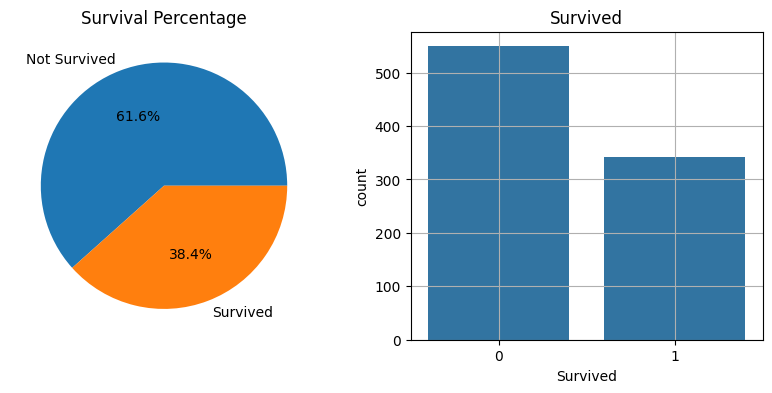

In [49]:
f, ax = plt.subplots(1, 2, figsize = (10, 4))

survival_counts = df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], labels = labels)
ax[0].set_title('Survival Percentage')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df, ax=ax[1])
ax[1].grid(True)
ax[1].set_title('Survived')

plt.show()

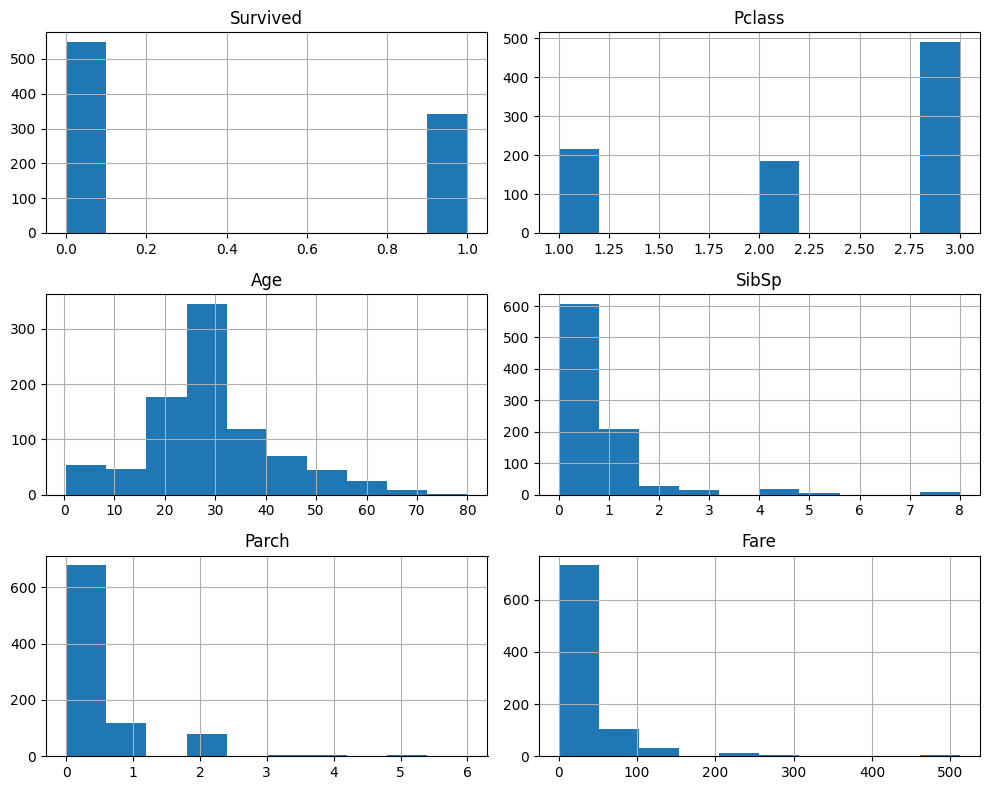

In [50]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'PassengerId' in numeric_cols:
  numeric_cols.remove('PassengerId')

df[numeric_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

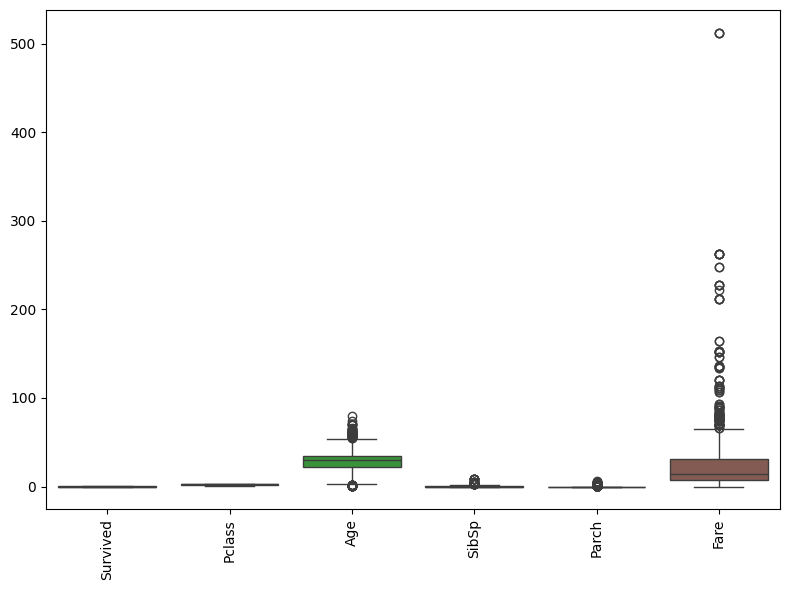

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

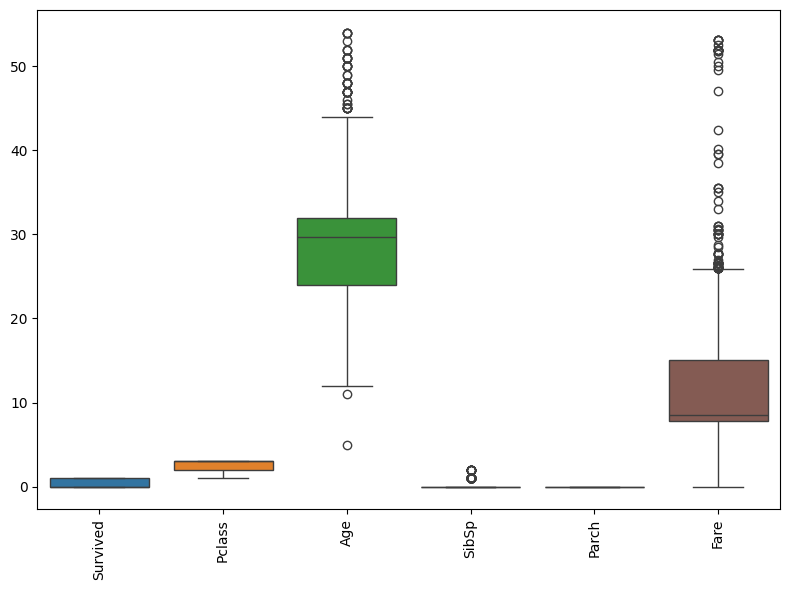

In [52]:
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Finding Feature Relationships

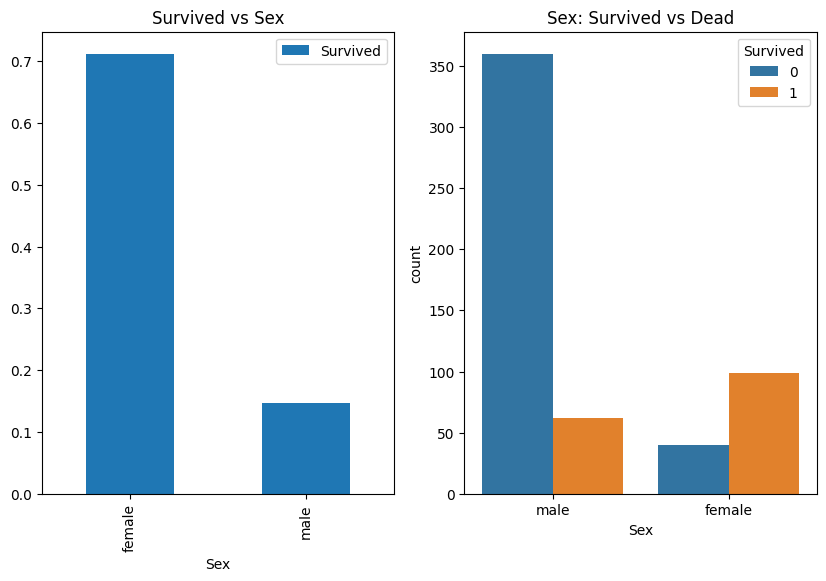

In [56]:
f, ax = plt.subplots(1, 2, figsize = (10, 6))

df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x = 'Sex', hue = 'Survived', data = df, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

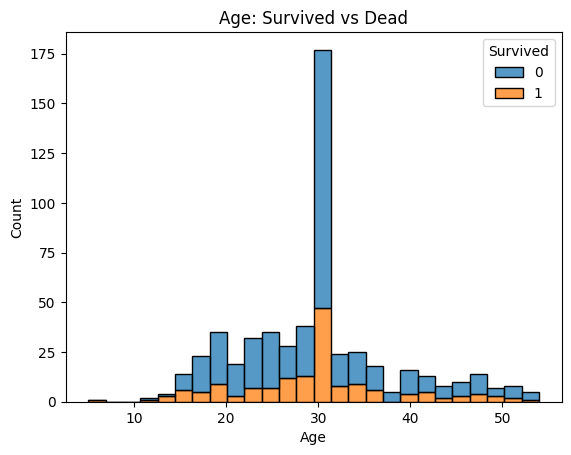

In [57]:
sns.histplot(x = 'Age', hue = 'Survived', data = df, multiple = 'stack')
plt.title('Age: Survived vs Dead')
plt.show()

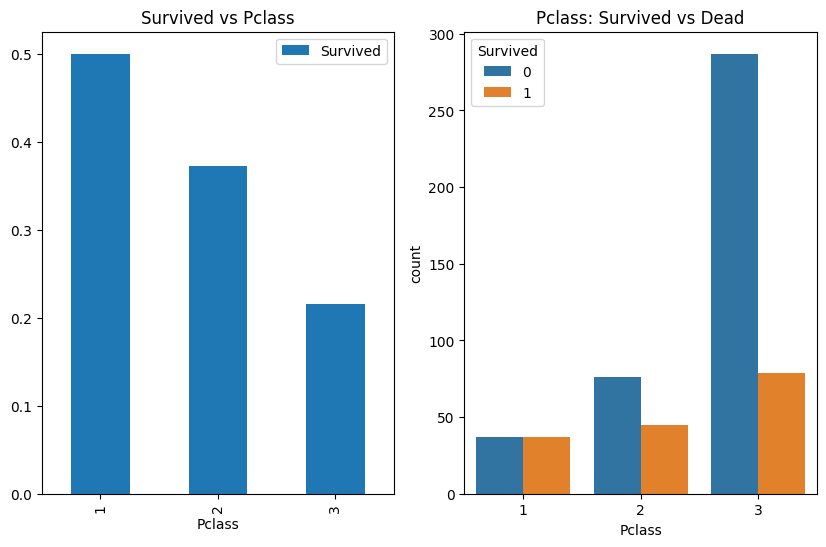

In [58]:
f, ax = plt.subplots(1, 2, figsize = (10, 6))

df[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Pclass')

sns.countplot(x = 'Pclass', hue = 'Survived', data = df, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

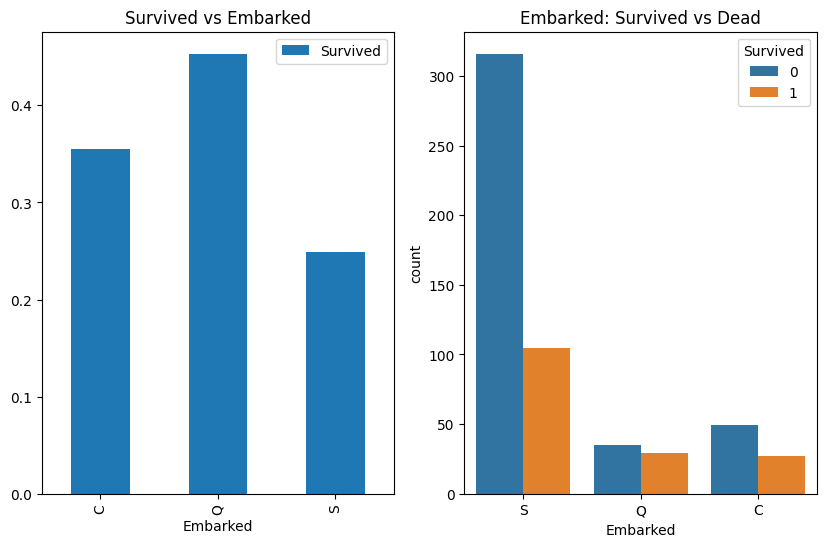

In [59]:
f, ax = plt.subplots(1, 2, figsize = (10, 6))

df[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Embarked')

sns.countplot(x = 'Embarked', hue = 'Survived', data = df, ax = ax[1])
ax[1].set_title('Embarked: Survived vs Dead')

plt.show()

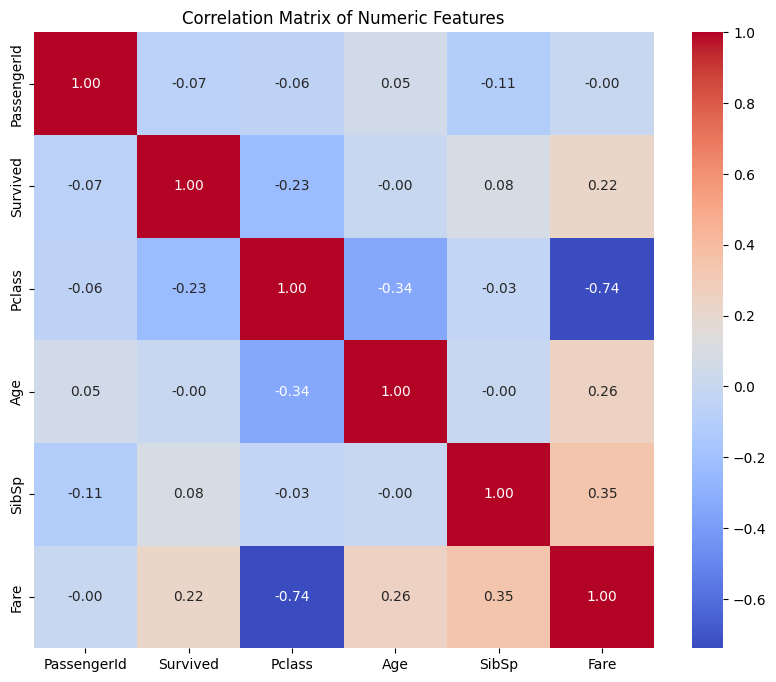

In [60]:
corr_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Parch' in numeric_cols:
  corr_cols.remove('Parch')

plt.figure(figsize = (10, 8))
sns.heatmap(df[corr_cols].corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

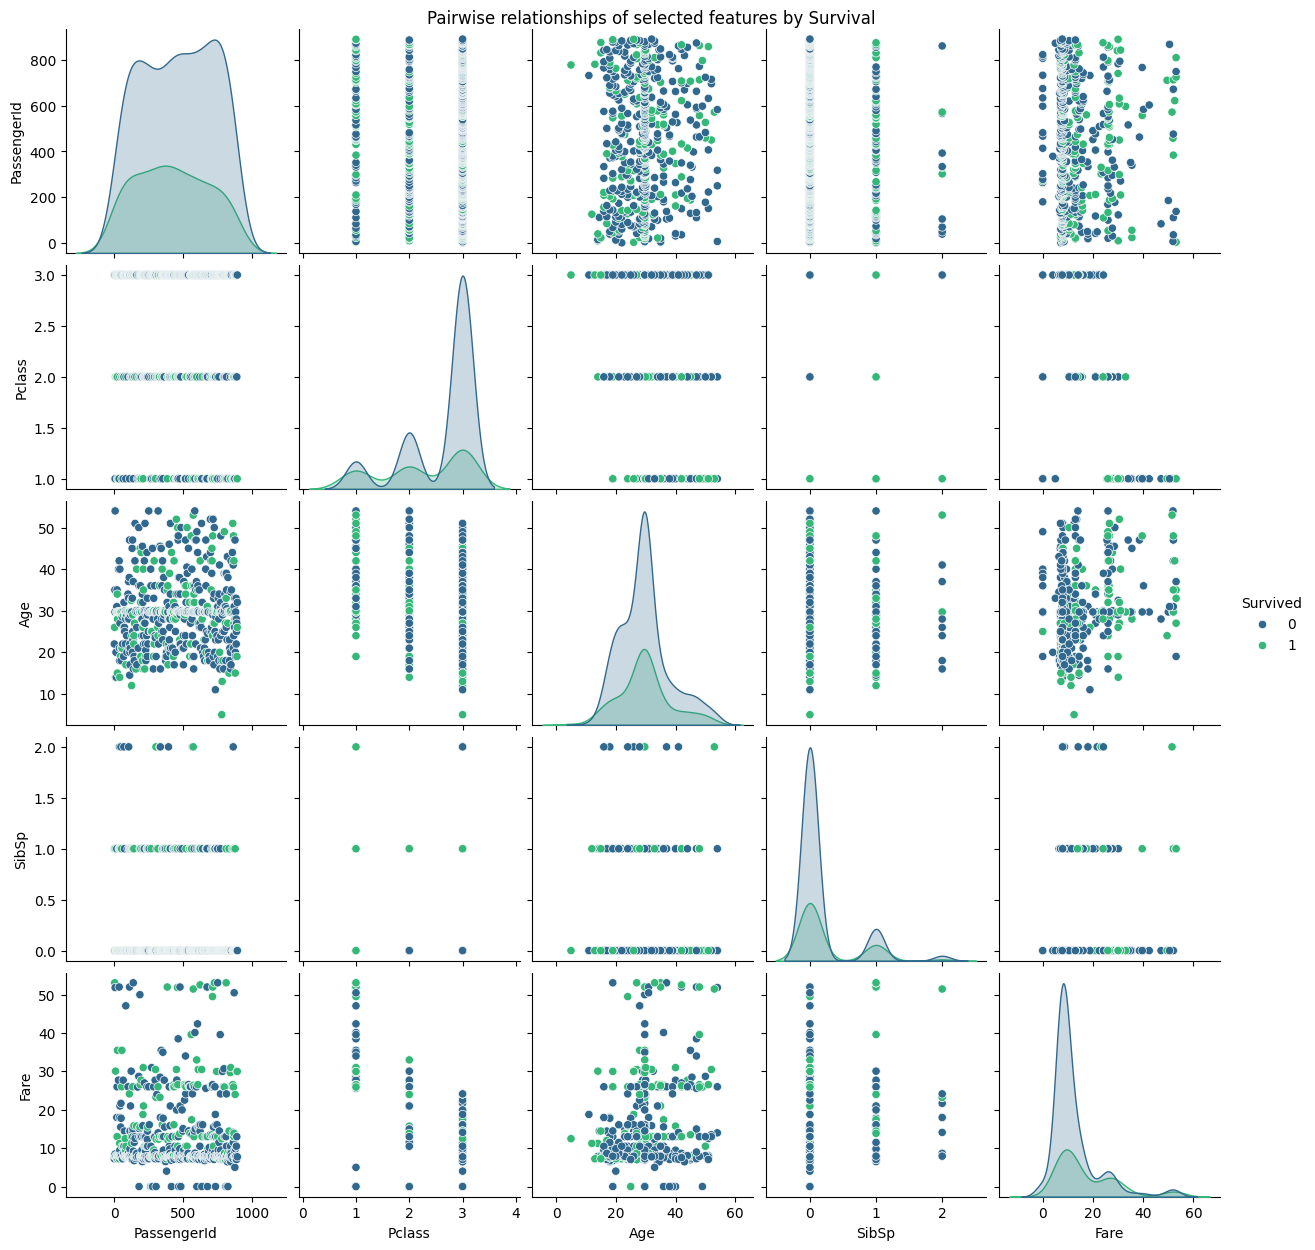

In [61]:
sns.pairplot(df[corr_cols], hue = 'Survived', palette = 'viridis')
plt.suptitle('Pairwise relationships of selected features by Survival', y = 1)
plt.show()

#Making Basic Feature-Level Inferences

In [27]:
print("\nBased on the visualizations and analyses performed:")
print("- **Sex** is a significant factor in survival, with females having a higher survival rate.")
print("- **Passenger Class (Pclass)** shows a clear trend: higher class passengers had a better chance of survival.")
print("- **Fare** seems positively correlated with survival.")
print("- **Age** distribution and its relationship with survival can be observed in the plots, suggesting potential age-related survival patterns.")
print("- Outliers in numerical features were identified and addressed.")
print("\nFurther analysis and modeling can provide deeper insights into the complex relationships within the data.")


Based on the visualizations and analyses performed:
- **Sex** is a significant factor in survival, with females having a higher survival rate.
- **Passenger Class (Pclass)** shows a clear trend: higher class passengers had a better chance of survival.
- **Fare** seems positively correlated with survival.
- **Age** distribution and its relationship with survival can be observed in the plots, suggesting potential age-related survival patterns.
- Outliers in numerical features were identified and addressed.

Further analysis and modeling can provide deeper insights into the complex relationships within the data.
